In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
df = pd.read_csv("//content//SPAM text message.csv")

In [324]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [325]:
df.shape

(5572, 2)

In [326]:
df["Category"].unique()

array(['ham', 'spam'], dtype=object)

In [327]:
df["Category"].value_counts()
#dataset is imbalance

ham     4825
spam     747
Name: Category, dtype: int64

In [328]:
df["Message"].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

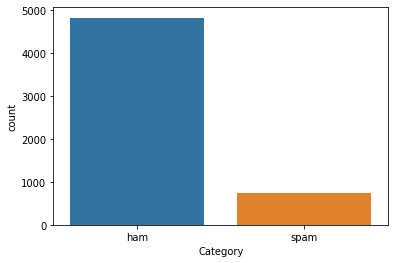

In [329]:
sns.countplot(x="Category",data = df)

In [330]:
# function to clean all messages
import re,string
def clean_text(message):
    text = message.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [331]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [332]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [333]:
# Data preprocessing
# clean text
# tokenziation
# removing stop words
# stemming
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()
def text_transform(text):
  text = word_tokenize(clean_text(text))
  words = [ps.stem(w) for w in text if w not in set(stopwords.words('english'))]
  return " ".join(words)

In [334]:
text_transform('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [335]:
# cleaning the message
df["Message"] = df["Message"].apply(text_transform)

In [336]:
df["Message"].unique()

array(['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
       'ok lar joke wif u oni',
       'free entri wkli comp win fa cup final tkt may text fa receiv entri questionstd txt ratetc appli',
       ..., 'piti mood soani suggest',
       'guy bitch act like id interest buy someth els next week gave us free',
       'rofl true name'], dtype=object)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [338]:
df.head()

,Category,Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt may ...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


In [339]:
# apply mapping spam : 1 ham : 0
df["Category"] = df["Category"].map({"spam":1,"ham":0})

In [340]:
df.head()

,Category,Message
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkt may ...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though


**Train test split**

In [341]:
from sklearn.model_selection import train_test_split
X = df["Message"]
y = df["Category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Vectorization of message**

In [342]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=3000)
X_train_vec = vec.fit_transform(X_train).toarray()
X_test_vec = vec.transform(X_test).toarray()


**Training Model**

In [343]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,precision_score
model = LogisticRegression()

In [344]:
model.fit(X_train_vec,y_train)

LogisticRegression()

In [345]:
# Prediction
y_pred = model.predict(X_test_vec)

In [346]:
#accuracy
lr_acc = accuracy_score(y_test,y_pred)
lr_pre = precision_score(y_test,y_pred)
print(lr_acc)
print(lr_pre)

0.9617224880382775
0.9761904761904762


In [347]:
cr1 = classification_report(y_test,y_pred)
print(cr1)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       0.98      0.73      0.84       224

    accuracy                           0.96      1672
   macro avg       0.97      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [348]:
text = "Dear Aman saxena, Bank of America is closing your bank account. Please confirm your PIN at http://www.google.com to keep your account activated."
text2 = "A [redacted] loan for $950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[redacted].co.uk to opt out reply stop"
text3 = "Buy 1 card get 1 free! Please kindly reply this email if you are interested. Thank you..."
text4 = "You could be entitled up to $3,160 in compensation from mis-sold PPT on a credit card or Loan. Please reply PPI for info or STOP to opt out."

In [349]:
clean_test_text = text_transform(text)
text_vec = vec.transform([clean_test_text])
print(clean_test_text)

dear aman saxena bank america close bank account pleas confirm pin keep account activ


In [350]:
model.predict(text_vec)

array([0])

**Adding weight**

In [351]:
from sklearn.model_selection import GridSearchCV

In [352]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }


In [353]:
new_model = LogisticRegression()

In [354]:
grid = GridSearchCV(new_model,hyperparam_grid,scoring="roc_auc",cv=100,n_jobs=-1,refit=True)

In [355]:
# grid.fit(X_train_vec,y_train)

In [356]:
# new_y_prec = grid.predict(X_test_vec)

In [357]:
# accuracy_score(y_test,new_y_prec)

In [358]:
# grid.predict(text_vec)

In [359]:
# cr = classification_report(y_test,new_y_prec)

In [360]:
# print(cr)

**Naive Bayes**

In [361]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [362]:
gnb.fit(X_train_vec,y_train)
y_pred = gnb.predict(X_test_vec)
gnb_acc = accuracy_score(y_test,y_pred)
gnb_pre = precision_score(y_test,y_pred)
print(gnb_acc)
print(gnb_pre)

0.8480861244019139
0.4630541871921182


In [363]:
mnb.fit(X_train_vec,y_train)
y_pred = mnb.predict(X_test_vec)
mnb_acc = accuracy_score(y_test,y_pred)
mnb_pre = precision_score(y_test,y_pred)
print(mnb_acc)
print(mnb_pre)

0.9742822966507177
1.0


In [364]:
bnb.fit(X_train_vec,y_train)
y_pred = gnb.predict(X_test_vec)
bnb_acc = accuracy_score(y_test,y_pred)
bnb_pre = precision_score(y_test,y_pred)
print(bnb_acc)
print(bnb_pre)

0.8480861244019139
0.4630541871921182


In [365]:
mnb.predict(text_vec)

array([0])

**creating pipeline**

In [366]:
# from sklearn.preprocessing import FunctionTransformer
# def fun_trans(input_series):
#   return input_series.toarray()

# function_transformer = FunctionTransformer(fun_trans)

In [367]:
# from sklearn.compose import ColumnTransformer
# clean_text_Fun = FunctionTransformer(text_transform)
# col_tran = ColumnTransformer([('Message',clean_text_Fun)],remainder='passthrough')

In [368]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('tdf_vector',TfidfVectorizer()),
    ('model',LogisticRegression())
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('tdf_vector', TfidfVectorizer()),
                ('model', LogisticRegression())])

In [369]:
predict = pipe.predict(X_test)
print(predict)

[0 0 0 ... 0 1 0]


In [370]:
accuracy_score(y_test,predict)

0.9629186602870813

In [371]:
data = {'Message':[clean_test_text]}
dataDf = pd.DataFrame(data)
pipe.predict(dataDf)

array([0])

**saving model**

In [372]:
import pickle

In [373]:
#saving model
with open("model","wb") as files:
  pickle.dump(mnb,files) 

In [374]:
#saving tdVec
with open('vec','wb') as files:
  pickle.dump(vec,files)

In [375]:
with open("model","rb") as files:
  saved_model = pickle.load(files)
  with open("vec","rb") as files:
    v = pickle.load(files)
    clean_text = text_transform(text2)
    tv = v.transform([clean_text]).toarray()
    result = saved_model.predict(tv)
    print(result)


[1]


In [376]:
# clean_text = text_transform(text2)
# print(clean_text)

In [377]:
# saved_model.predict(pd.DataFrame({"Message":[clean_text]}))